## **CATEGORIZACIÓN DE LOS TIPOS DE CYBERBULLYING PRESENTE EN PUBLICACIONES DE REDES SOCIALES**




####Propuesta solución (SEMMA):

---



1. Análisis dataset.
2. Preprocesamiento de datos.
3. Implemetación y metricas modelos de aprendizaje supervisado (7).
4. Implemetación y metricas modelos de aprendizaje no supervisado (4).




In [1]:
#Carga del dataset
from google.colab import files
uploaded = files.upload()

Saving cyberbullying_tweets.csv to cyberbullying_tweets.csv


###Análisis y Preprocesamiento del dataset


In [2]:
#CSV -> DataFrame
import pandas as pd
df = pd.read_csv("cyberbullying_tweets.csv", encoding='utf-8', low_memory=False)


In [3]:
# Numero de filas y columnas
print("Número de filas y columnas:", df.shape)

# Primeras 20 filas
print("\nPrimeras filas:")
print(df.head(20))

# Tipos de datos
print("\nTipos de datos:")
print(df.dtypes)

# Valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Duplicados
print("\nNúmero de filas duplicadas:")
print(df.duplicated().sum())


Número de filas y columnas: (47692, 2)

Primeras filas:
                                           tweet_text cyberbullying_type
0   In other words #katandandre, your food was cra...  not_cyberbullying
1   Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2   @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3   @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4   @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying
5   @Raja5aab @Quickieleaks Yes, the test of god i...  not_cyberbullying
6   Itu sekolah ya bukan tempat bully! Ga jauh kay...  not_cyberbullying
7   Karma. I hope it bites Kat on the butt. She is...  not_cyberbullying
8        @stockputout everything but mostly my priest  not_cyberbullying
9   Rebecca Black Drops Out of School Due to Bully...  not_cyberbullying
10               @Jord_Is_Dead http://t.co/UsQInYW5Gn  not_cyberbullying
11   The Bully flushes on KD http://twitvid.com/A2TNP  not_cyberbull

In [4]:
# Eliminar filas duplicadas
df = df.drop_duplicates()
print("Dataset después de eliminar duplicados:", df.shape)


Dataset después de eliminar duplicados: (47656, 2)


In [5]:
# Distribución por clase (conteo y %)
class_counts = df['cyberbullying_type'].value_counts()
class_percent = df['cyberbullying_type'].value_counts(normalize=True) * 100

# Resultados de la distribución
for label, count, percent in zip(class_counts.index, class_counts, class_percent):
    print(f"{label}: {count} tuits ({percent:.2f}%)")


#Podemos ver que las clases estan distribuidas homogeneamente con alrededor de 16% del total de tuits x clase.


religion: 7997 tuits (16.78%)
age: 7992 tuits (16.77%)
ethnicity: 7959 tuits (16.70%)
gender: 7948 tuits (16.68%)
not_cyberbullying: 7937 tuits (16.65%)
other_cyberbullying: 7823 tuits (16.42%)


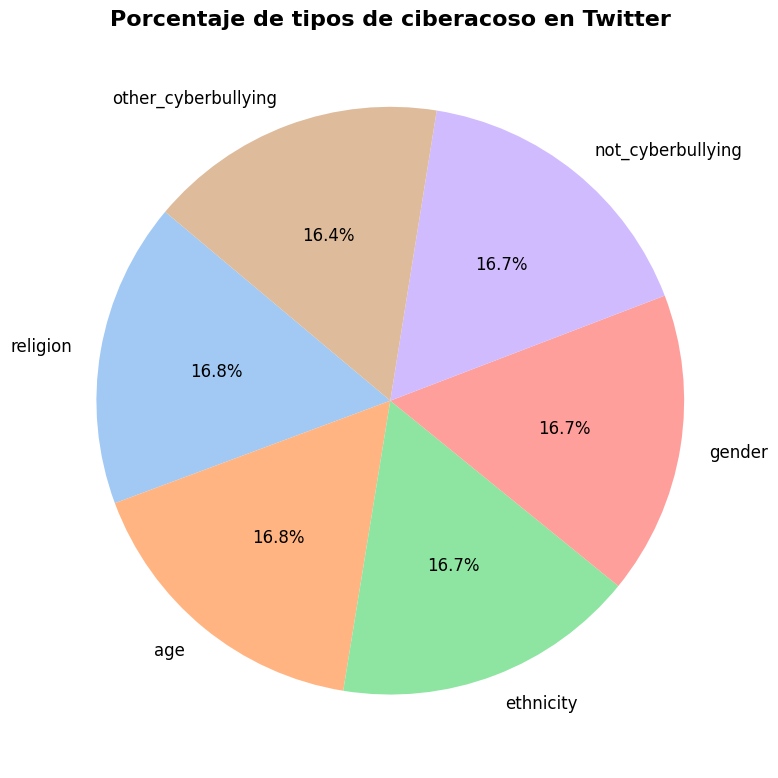

In [6]:
# Grafico (Pie Chart) distribución por clases
import seaborn as sns
import matplotlib.pyplot as plt

colors = sns.color_palette("pastel")
# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, textprops={'fontsize': 12})
plt.title("Porcentaje de tipos de ciberacoso en Twitter", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


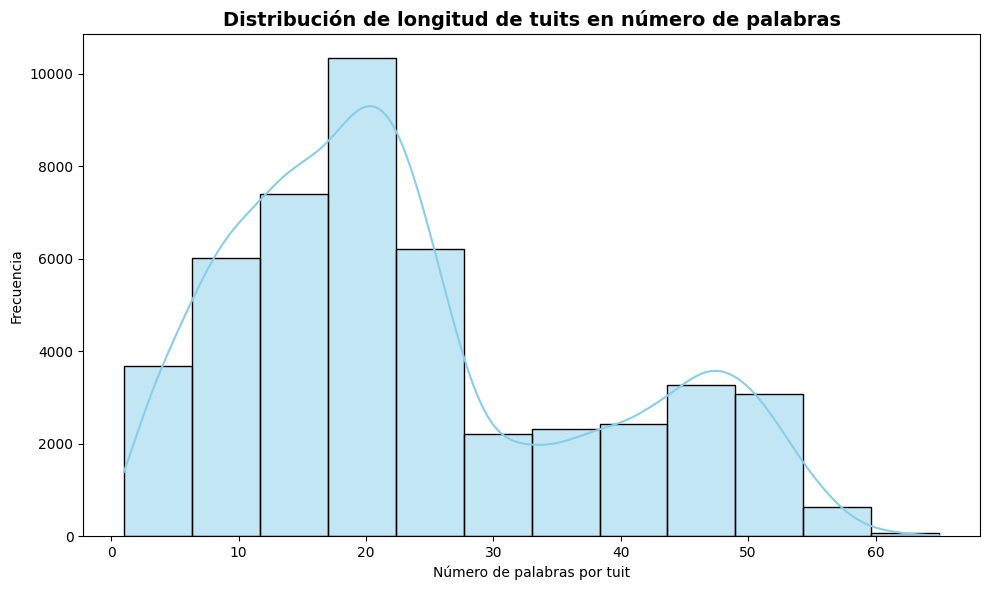

In [7]:
# Calcular longitud de tuits
df['tweet_length_raw'] = df['tweet_text'].astype(str).apply(lambda x: len(x.split()))
df_filtered = df[df['tweet_length_raw'] <= 70]

# Graficar histograma con linea de densidad
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['tweet_length_raw'], bins=12, kde=True, color='skyblue')

# Etiquetas y formato
plt.title('Distribución de longitud de tuits en número de palabras', fontsize=14, fontweight='bold')
plt.xlabel('Número de palabras por tuit')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.savefig("distribucion_longitud_tuits_60palabras.png", dpi=300)
plt.show()


/tmp/ipython-input-8-3306097436.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


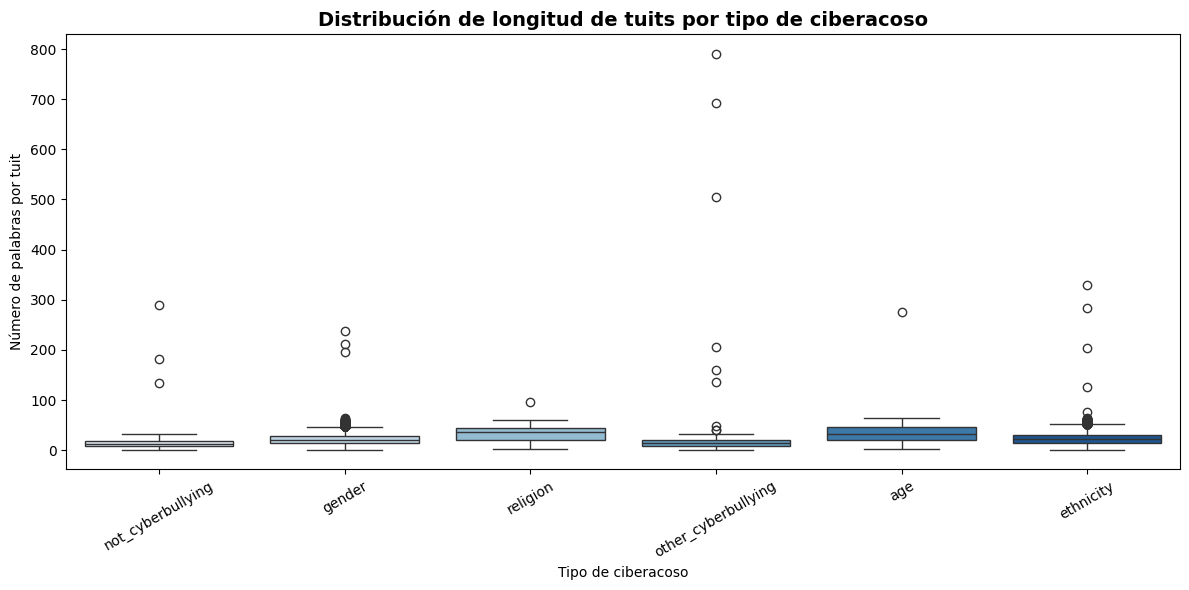

In [8]:
#Distribución de longitud de tuits por tipo de ciberacoso
# Crear boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='cyberbullying_type',
    y='tweet_length_raw',
    data=df,
    palette='Blues'
)


plt.title('Distribución de longitud de tuits por tipo de ciberacoso', fontsize=14, fontweight='bold')
plt.xlabel('Tipo de ciberacoso')
plt.ylabel('Número de palabras por tuit')
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig("boxplot_longitud_por_tipo.png", dpi=300)
plt.show()


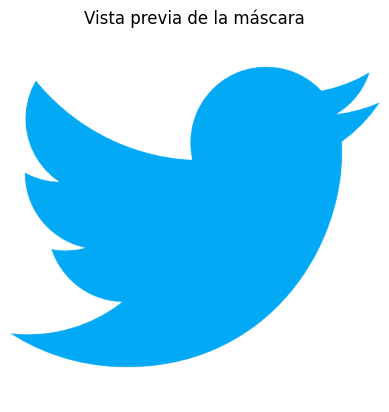

In [9]:
#Mascara para nube de palabras
from PIL import Image
import numpy as np

mask = np.array(Image.open("twitter.png"))
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.title('Vista previa de la máscara')
plt.show()


In [10]:
!pip install wordcloud pillow nltk
from wordcloud import WordCloud, STOPWORDS
import re
import nltk

nltk.download('punkt', force=True) # tokenizador de texto
nltk.download('wordnet') #diccionario
nltk.download('stopwords') #lista de stopwords
nltk.download('omw-1.4') #traducciones

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


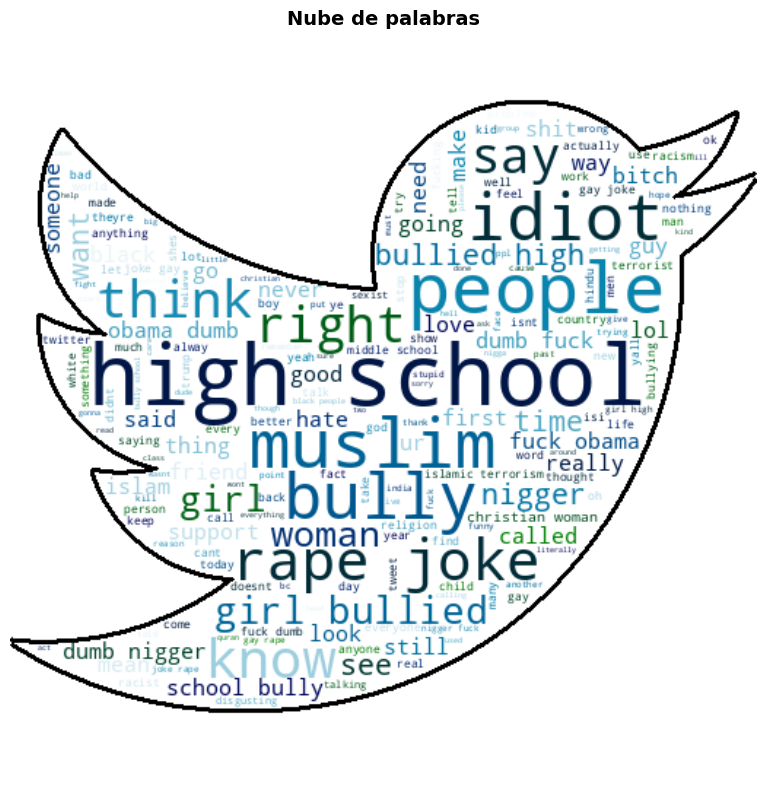

In [11]:
#Herramienta de lematización
lemmatizer = WordNetLemmatizer()

#Listado de stopwords en ingles
stop_words_nltk = set(stopwords.words('english'))
#print(stop_words_nltk)

# Cargar la imagen con logo X
mask = np.array(Image.open("twitter.png"))

# Stopwords que para el contexto se suman a las de NLTK
custom_stopwords = set(STOPWORDS)
custom_stopwords.update([
    'rt', 'http', 'https', 'co', 'amp', 't', 'u', 'im', 'get', 'got',
    'dont', 'youre', 'like', 'thats', 'one', 'also', 'would', 'even', 'mkr'
])

# Función para la limpieza del texto
def clean_text(text):
    text = re.sub(r'http\S+', '', str(text))       # quitar URLs
    text = re.sub(r'@\w+', '', text)               # quitar menciones
    text = re.sub(r'[^A-Za-z\s]', '', text)        # quitar signos y números
    text = text.lower()                            # minúsculas
    return text

#  limpiar, tokenizar, lematizar
def preprocess_text(text):
    text = clean_text(text)
    tokens = text.split()
    lemmatized_tokens = [
        lemmatizer.lemmatize(token)
        for token in tokens
        if token not in stop_words_nltk and token not in custom_stopwords and len(token) > 1
    ]
    return lemmatized_tokens

# Aplicar preprocesamieto
df['tokens'] = df['tweet_text'].apply(preprocess_text)

# Unir todos los tokens para la nube de palabras
all_tokens = [token for tokens in df['tokens'] for token in tokens]
text_data = ' '.join(all_tokens)

# Nube de palabras
wordcloud = WordCloud(
    stopwords=custom_stopwords,
    background_color='white',
    max_words=200,
    mask=mask,
    contour_width=2,
    contour_color='black',
    colormap='ocean',
    max_font_size=120,
    random_state=42
).generate(text_data)

# Mostrar la nube
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig("nube_palabras.png", dpi=300)
plt.show()


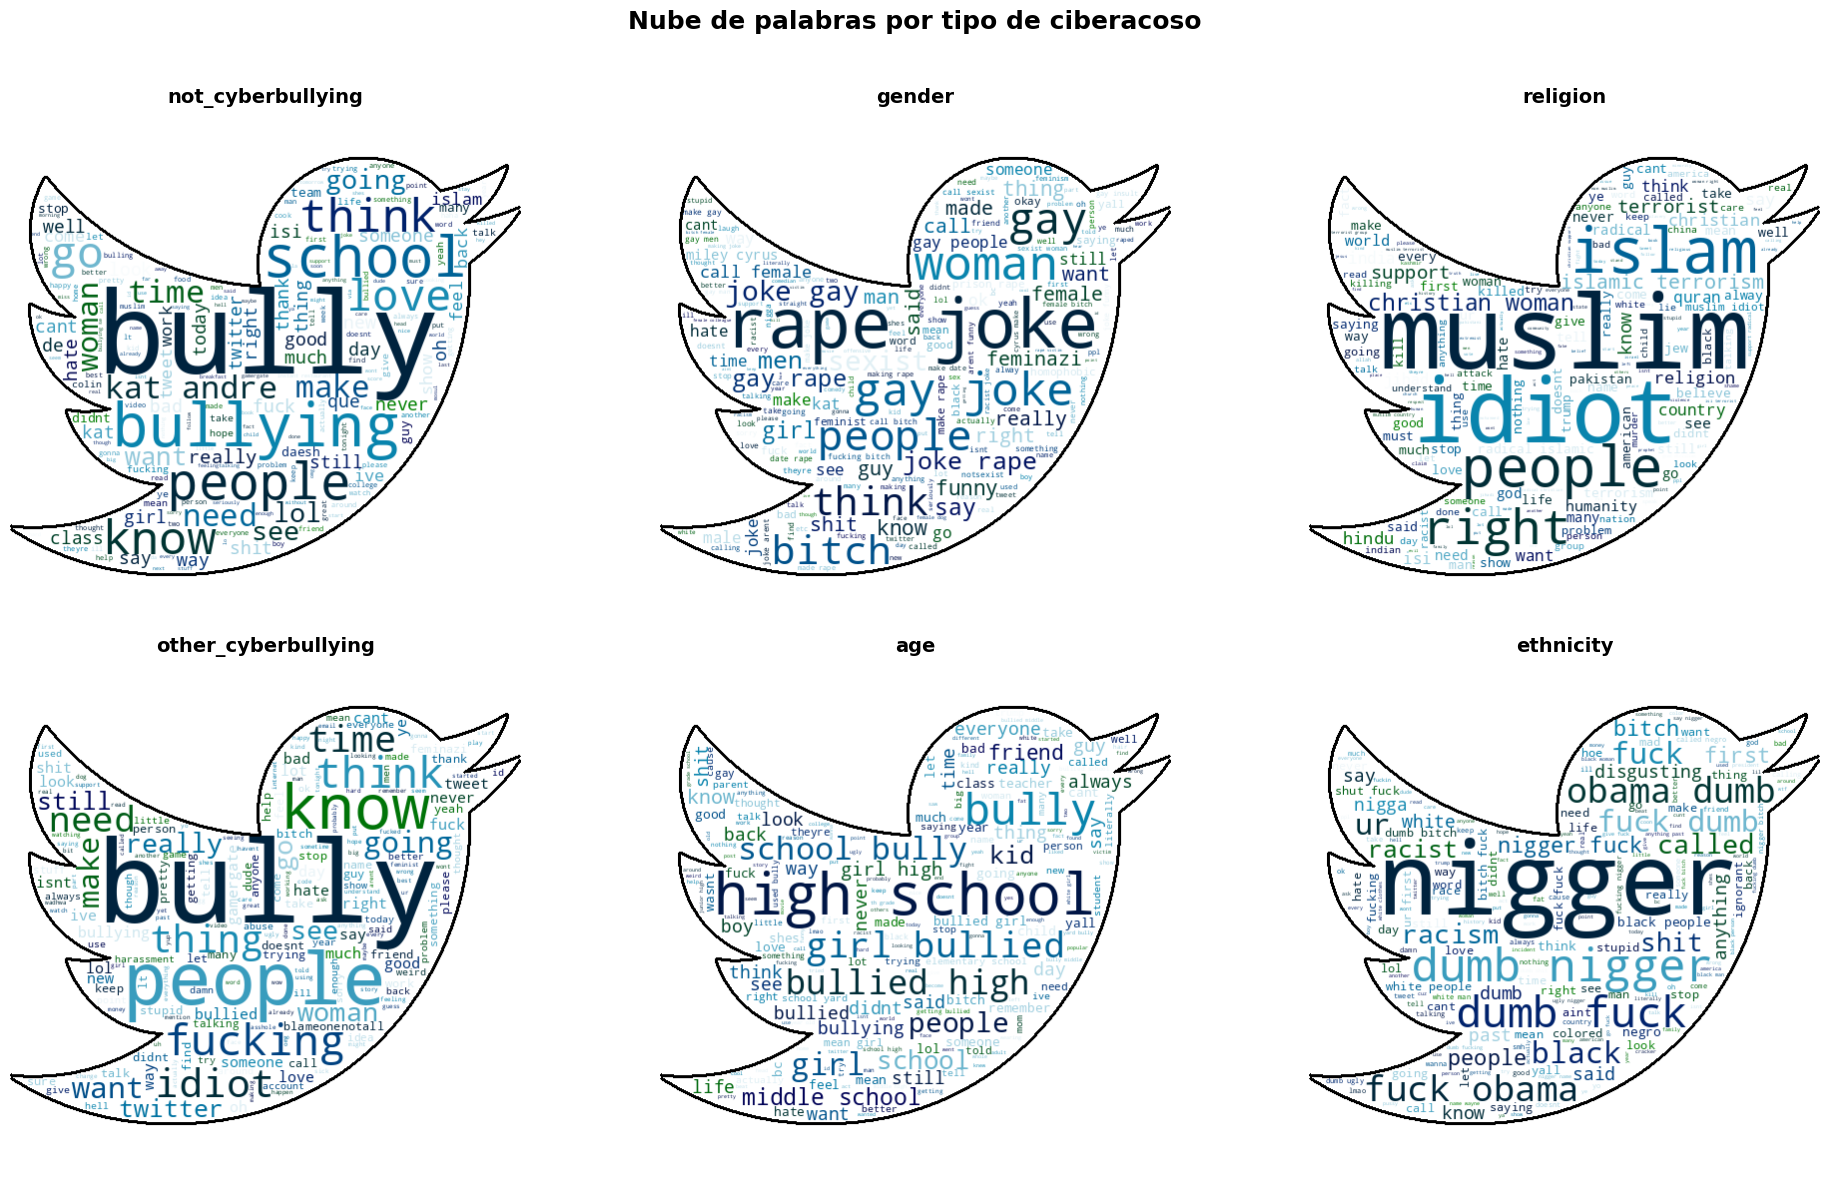

In [12]:
#Clases de ciberacoso presentes en el df
clases = df['cyberbullying_type'].unique()

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

# nube de palabras por clase
for idx, clase in enumerate(clases):
    subset = df[df['cyberbullying_type'] == clase]
    text_data = ' '.join([' '.join(tokens) for tokens in subset['tokens'].dropna()])

    wordcloud = WordCloud(
        stopwords=custom_stopwords,
        background_color='white',
        max_words=200,
        mask=mask,
        contour_width=2,
        contour_color='black',
        colormap='ocean',
        max_font_size=120,
        random_state=42
    ).generate(text_data)

    axes[idx].imshow(wordcloud, interpolation='bilinear')
    axes[idx].axis('off')
    axes[idx].set_title(clase, fontsize=14, fontweight='bold')

plt.suptitle("Nube de palabras por tipo de ciberacoso", fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("nube_palabras_por_clase_mejorada.png", dpi=300)
plt.show()



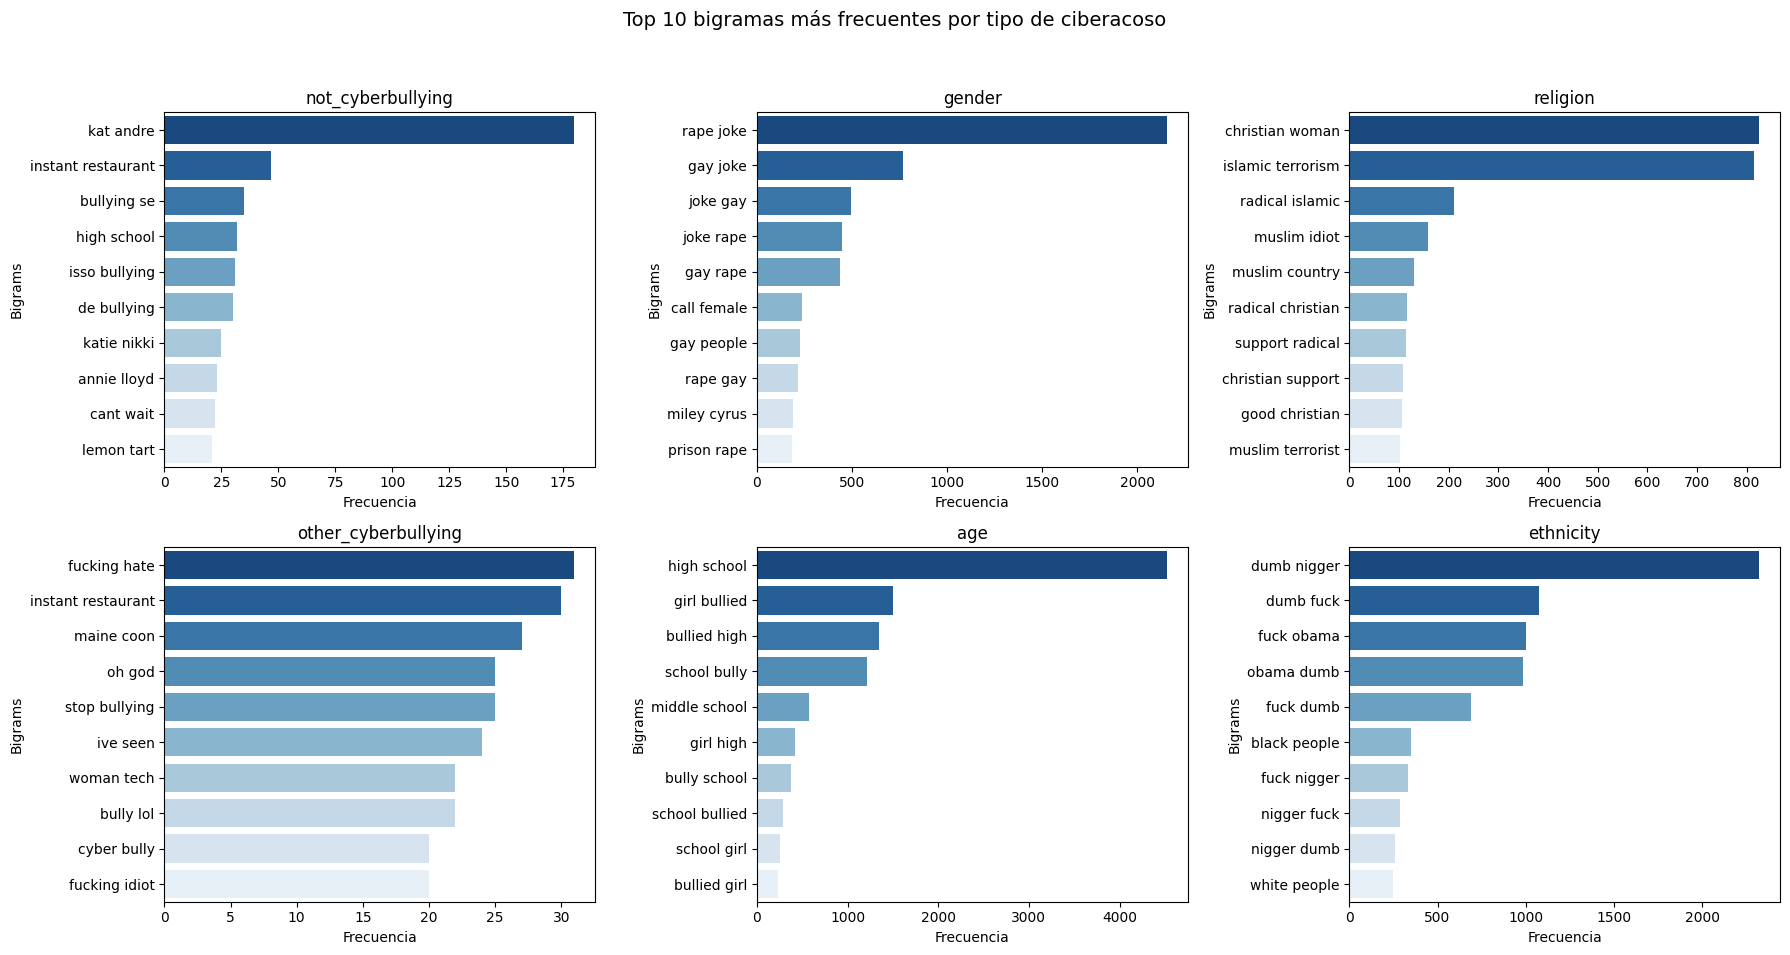

In [55]:
from nltk.util import ngrams
from collections import Counter

# Función para obtener los top bigramas a partir de listas de tokens
def get_top_bigrams(token_lists, n=10):
    bigram_counter = Counter()

    for tokens in token_lists:
        # tokens ya lematizados
        filtered_tokens = [word for word in tokens if word not in custom_stopwords]
        bigrams = ngrams(filtered_tokens, 2)
        bigram_counter.update(bigrams)

    return bigram_counter.most_common(n)

# Obtener las categorías
categories = df['cyberbullying_type'].unique()
top_bigrams_by_category = {}

# Calcular bigramas por categoría
for category in categories:
    subset = df[df['cyberbullying_type'] == category]
    top_bigrams = get_top_bigrams(subset['tokens'].dropna())
    top_bigrams_by_category[category] = pd.DataFrame(top_bigrams, columns=['bigram', 'frequency'])

# Graficar
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle("Top 10 bigramas más frecuentes por tipo de ciberacoso", fontsize=14)

axes = axes.flatten()

for idx, (category, df_bigrams) in enumerate(top_bigrams_by_category.items()):
    bigram_labels = [' '.join(b) for b in df_bigrams['bigram']]
    sns.barplot(
        x='frequency',
        y=bigram_labels,
        data=df_bigrams,
        ax=axes[idx],
        palette='Blues_r'
    )
    axes[idx].set_title(category)
    axes[idx].set_xlabel("Frecuencia")
    axes[idx].set_ylabel("Bigrams")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


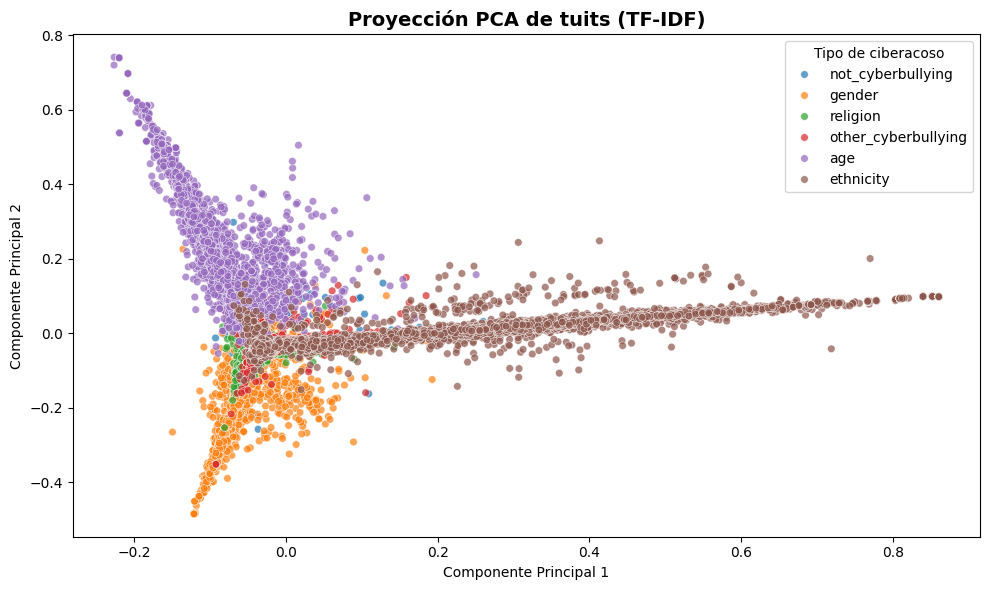

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA


#df['clean_text'] = df['tweet_text'].astype(str)
df['clean_text'] = df['tokens'].apply(lambda x: ' '.join(x))

# vectorización TF-IDF
vectorizer = TfidfVectorizer(max_features=3000)
X_tfidf = vectorizer.fit_transform(df['clean_text'])

# aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf.toarray())

#crear un df con las componentes ppales y su categoria original
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['cyberbullying_type'] = df['cyberbullying_type']

#visualización
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_pca,
    x='PC1',
    y='PC2',
    hue='cyberbullying_type',
    palette='tab10',
    s=30,
    alpha=0.7
)

plt.title("Proyección PCA de tuits (TF-IDF)", fontsize=14, fontweight='bold')
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Tipo de ciberacoso")
plt.tight_layout()
plt.savefig("pca_tfidf_2d.png", dpi=300)
plt.show()


#print(f"Varianza explicada PC1: {pca.explained_variance_ratio_[0]:.2%}")
#print(f"Varianza explicada PC2: {pca.explained_variance_ratio_[1]:.2%}")


# Implementación Algoritmos Supervisados

## Regresión Logistica

Accuracy: 0.8123164078892152
Mejor C encontrado: 1.0

Reporte de Clasificación:
                     precision    recall  f1-score   support

                age       0.95      0.97      0.96      1598
          ethnicity       0.97      0.97      0.97      1592
             gender       0.91      0.81      0.86      1590
  not_cyberbullying       0.56      0.57      0.56      1587
other_cyberbullying       0.56      0.61      0.59      1565
           religion       0.96      0.94      0.95      1600

           accuracy                           0.81      9532
          macro avg       0.82      0.81      0.81      9532
       weighted avg       0.82      0.81      0.81      9532



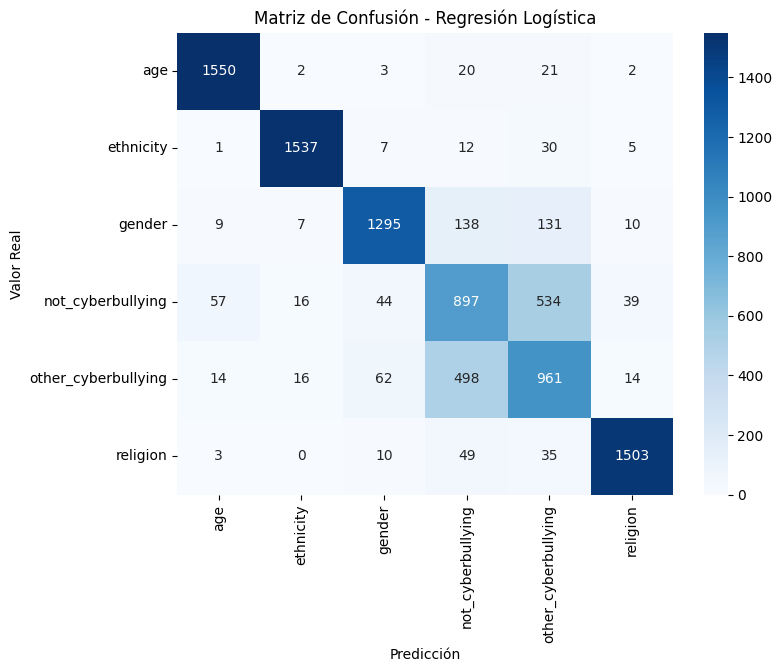

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings("ignore")


# Etiquetas
X = vectorizer.fit_transform(df['clean_text']) #vectores numericos
y = df['cyberbullying_type'] #clases

# División del dataset (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Modelo con  validación cruzada
param_grid = {'C': np.logspace(-4, 2, 25)}
model = GridSearchCV(LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs'),
                     param_grid, cv=10, scoring='accuracy')
model.fit(X_train, y_train)

# Prediccion
y_pred = model.predict(X_test)

# Evaluacion
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Mejor C encontrado:", model.best_params_['C'])
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de Confusion
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.best_estimator_.classes_,
            yticklabels=model.best_estimator_.classes_)
plt.title("Matriz de Confusión - Regresión Logística")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()


## SVM

Accuracy: 0.8008812421317667
Mejor C encontrado: 0.5994842503189409

Reporte de clasificación:
                      precision    recall  f1-score   support

                age       0.94      0.97      0.96      1598
          ethnicity       0.97      0.97      0.97      1592
             gender       0.89      0.80      0.84      1590
  not_cyberbullying       0.52      0.54      0.53      1587
other_cyberbullying       0.55      0.58      0.56      1565
           religion       0.96      0.93      0.95      1600

           accuracy                           0.80      9532
          macro avg       0.81      0.80      0.80      9532
       weighted avg       0.81      0.80      0.80      9532



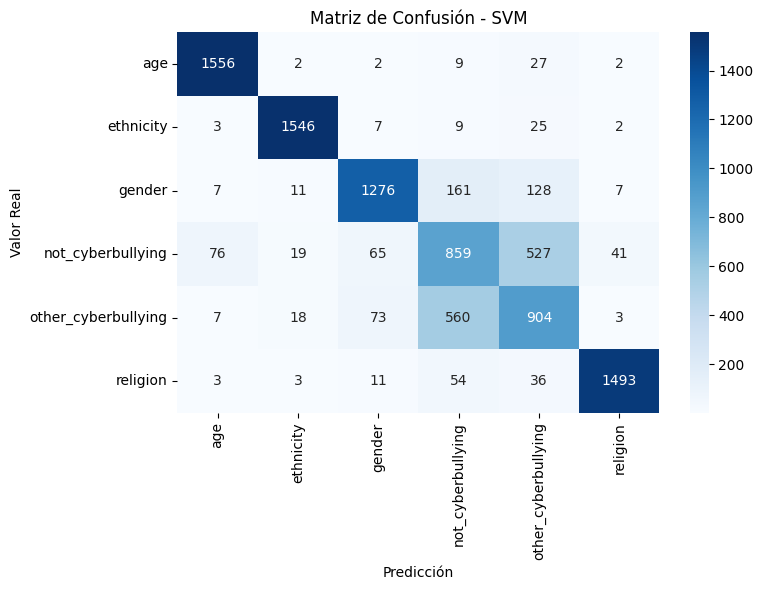

In [15]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline

# división del dataset
X = df['clean_text']
y = df['cyberbullying_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# pipeline
svm_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=500, ngram_range=(1, 1))),
    ('svm', SVC(kernel='linear'))
])

# búsqueda aleatoria de hiperparámetros
param_distributions = {'svm__C': np.logspace(-3, 2, 10)}  # solo 10 valores
random_search = RandomizedSearchCV(
    svm_pipeline,
    param_distributions=param_distributions,
    n_iter=5,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

# entrenar
random_search.fit(X_train, y_train)

# predicción y evaluación
y_pred = random_search.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Mejor C encontrado:", random_search.best_params_['svm__C'])
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

# matriz de confusión
labels = random_search.best_estimator_.named_steps['svm'].classes_
conf_mat = confusion_matrix(y_test, y_pred, labels=labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Matriz de Confusión - SVM")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.tight_layout()
plt.show()


## Arbol de decisión


Mejores parámetros encontrados:
{'tree__criterion': 'gini', 'tree__max_depth': None, 'tree__min_samples_leaf': 5, 'tree__min_samples_split': 2}

Accuracy: 0.7711917750734368

Reporte de clasificación:
                      precision    recall  f1-score   support

                age       0.97      0.96      0.96      1598
          ethnicity       0.97      0.96      0.97      1592
             gender       0.82      0.78      0.80      1590
  not_cyberbullying       0.46      0.43      0.45      1587
other_cyberbullying       0.47      0.54      0.51      1565
           religion       0.96      0.93      0.94      1600

           accuracy                           0.77      9532
          macro avg       0.78      0.77      0.77      9532
       weighted avg       0.78      0.77      0.77      9532



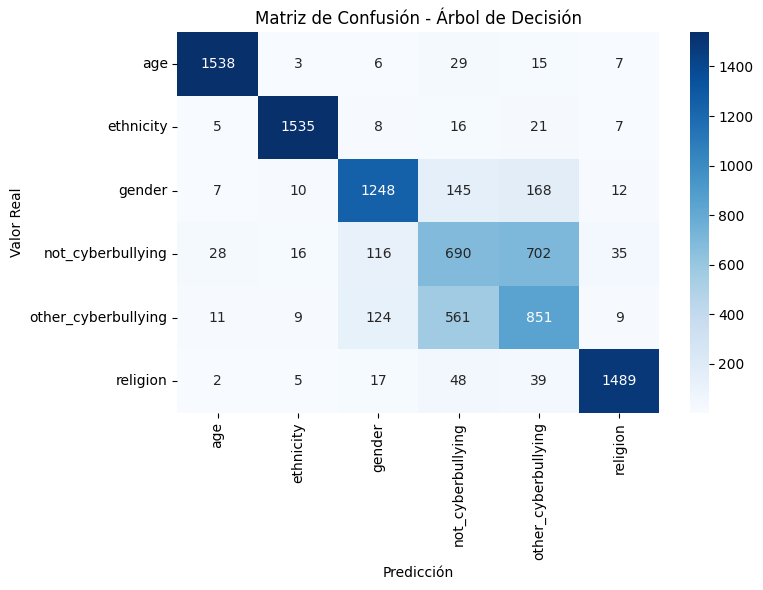

In [16]:
from sklearn.tree import DecisionTreeClassifier


# etiquetas
X = df['clean_text']
y = df['cyberbullying_type']

# división del dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# pipeline
tree_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=500, ngram_range=(1, 1))),  # más rápido
    ('tree', DecisionTreeClassifier(random_state=42))
])

# grid
param_grid = {
    'tree__max_depth': [10, 20, None],
    'tree__min_samples_split': [2, 10],
    'tree__min_samples_leaf': [1, 5],
    'tree__criterion': ['gini', 'entropy']
}

grid_search_tree = GridSearchCV(
    tree_pipeline,
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

# entrenar
grid_search_tree.fit(X_train, y_train)

# resultados
print("Mejores parámetros encontrados:")
print(grid_search_tree.best_params_)

# predicción
y_pred = grid_search_tree.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

# matriz de confusión
labels = grid_search_tree.best_estimator_.named_steps['tree'].classes_
conf_mat = confusion_matrix(y_test, y_pred, labels=labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title("Matriz de Confusión - Árbol de Decisión")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.tight_layout()
plt.show()


In [17]:
from sklearn.tree import export_graphviz
import graphviz

# modelo entrenado y nombres de features
clf_tree = grid_search_tree.best_estimator_.named_steps['tree']
feature_names = grid_search_tree.best_estimator_.named_steps['tfidf'].get_feature_names_out()

export_graphviz(
    clf_tree,
    out_file="tree.dot",
    feature_names=feature_names,
    class_names=clf_tree.classes_,
    filled=True,
    rounded=True,
    special_characters=True,
    proportion=True,
    max_depth=3
)

import pydot
(graph,) = pydot.graph_from_dot_file("tree.dot")

blue_colors = ['#e3f2fd', '#bbdefb', '#90caf9', '#64b5f6', '#42a5f5',
               '#2196f3', '#1e88e5', '#1976d2', '#1565c0', '#0d47a1']

for i, node in enumerate(graph.get_nodes()):
    if node.get_fillcolor():
        node.set_fillcolor(blue_colors[i % len(blue_colors)])

graph.write_png("arbol_azul_degradado.png")


## Random Forest

Mejores parámetros encontrados:
{'rf__max_depth': None, 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 10, 'rf__n_estimators': 100}

Accuracy: 0.80

Reporte de clasificación:
                      precision    recall  f1-score   support

                age       0.99      0.97      0.98      1598
          ethnicity       0.97      0.97      0.97      1592
             gender       0.88      0.82      0.85      1590
  not_cyberbullying       0.54      0.43      0.48      1587
other_cyberbullying       0.52      0.68      0.59      1565
           religion       0.96      0.95      0.96      1600

           accuracy                           0.80      9532
          macro avg       0.81      0.80      0.80      9532
       weighted avg       0.81      0.80      0.81      9532



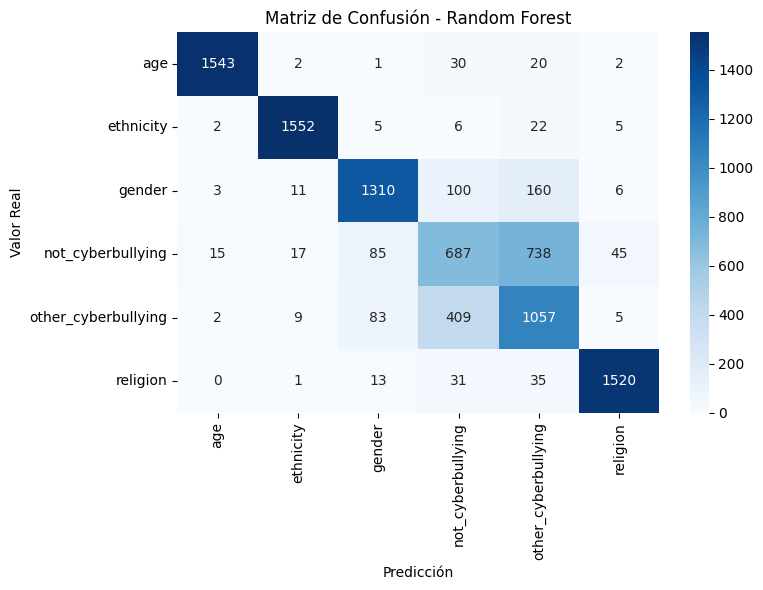

In [18]:
from sklearn.ensemble import RandomForestClassifier


# etiquetas
X = df['clean_text']
y = df['cyberbullying_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# pipeline
rf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=500, ngram_range=(1, 1))),
    ('rf', RandomForestClassifier(random_state=42))
])

# grid reducido
param_grid = {
    'rf__n_estimators': [100],
    'rf__max_depth': [10, 20, None],
    'rf__min_samples_split': [2, 10],
    'rf__min_samples_leaf': [1, 4]
}
# 1 × 3 × 2 × 2 = 12 combinaciones × 3 folds = 36 entrenamientos

grid_search_rf = GridSearchCV(
    rf_pipeline,
    param_grid=param_grid,
    cv=3,  # menos pliegues
    scoring='accuracy',
    n_jobs=-1
)

# entrenar
grid_search_rf.fit(X_train, y_train)

# resultados
print("Mejores parámetros encontrados:")
print(grid_search_rf.best_params_)

# predicción
y_pred = grid_search_rf.predict(X_test)

# evaluación
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

# matriz de confusión
labels = grid_search_rf.best_estimator_.named_steps['rf'].classes_
conf_mat = confusion_matrix(y_test, y_pred, labels=labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title("Matriz de Confusión - Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.tight_layout()
plt.savefig("confusion_matrix_rf_grid.png", dpi=300)
plt.show()


## k-Nearest Neighbor

Fitting 3 folds for each of 18 candidates, totalling 54 fits

 Mejores parámetros: {'features__svd__n_components': 50, 'knn__metric': 'manhattan', 'knn__n_neighbors': 7}

 Mejor accuracy validación cruzada: 0.76

 Accuracy en test set: 0.77

 Reporte de clasificación:

                     precision    recall  f1-score   support

                age       0.94      0.96      0.95       958
          ethnicity       0.93      0.96      0.94       967
             gender       0.81      0.77      0.79       954
  not_cyberbullying       0.51      0.47      0.49       959
other_cyberbullying       0.52      0.55      0.53       941
           religion       0.91      0.92      0.92       940

           accuracy                           0.77      5719
          macro avg       0.77      0.77      0.77      5719
       weighted avg       0.77      0.77      0.77      5719



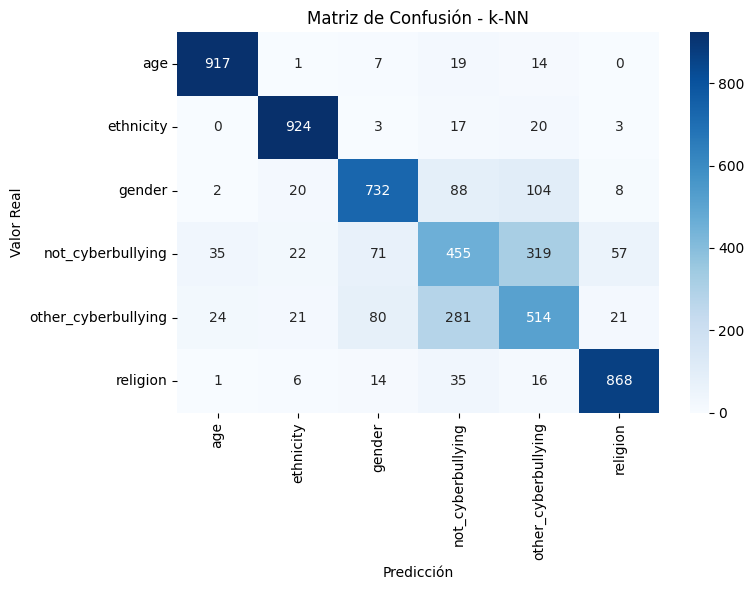

In [19]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer, FunctionTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

#reducimos el dataset al 60% por rendimiento
df_small = df.sample(frac=0.6, random_state=42)

#etiquetas
X = df_small[['clean_text']]
y = df_small['cyberbullying_type']

#encoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split( X, y_encoded, stratify=y_encoded, test_size=0.2, random_state=42)

# pipelie
text_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2), max_features=3000)),
    ('svd', TruncatedSVD(random_state=42)),
    ('norm', Normalizer(copy=False))
])

full_pipeline = Pipeline([
    ('text', FunctionTransformer(lambda x: x['clean_text'], validate=False)),
    ('features', text_pipeline),
    ('knn', KNeighborsClassifier())
])


param_grid = {
    'features__svd__n_components': [50, 100, 150],
    'knn__n_neighbors': [3, 5, 7],
    'knn__metric': ['manhattan', 'euclidean']
}

grid = GridSearchCV(full_pipeline, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid.fit(X_train, y_train)

print(f"\n Mejores parámetros: {grid.best_params_}")
print(f"\n Mejor accuracy validación cruzada: {grid.best_score_:.2f}")

# evaluacion
y_pred = grid.predict(X_test)
y_pred_labels = label_encoder.inverse_transform(y_pred)
y_test_labels = label_encoder.inverse_transform(y_test)

accuracy = accuracy_score(y_test_labels, y_pred_labels)
print(f"\n Accuracy en test set: {accuracy:.2f}")
print("\n Reporte de clasificación:\n")
print(classification_report(y_test_labels, y_pred_labels))

# Matriz de confusión
conf_mat = confusion_matrix(y_test_labels, y_pred_labels)
labels = label_encoder.classes_

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title("Matriz de Confusión - k-NN")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.tight_layout()
plt.savefig("confusion_matrix_knn_grid.png", dpi=300)
plt.show()


## Naive Bayes


 Mejor alpha: {'nb__alpha': 2.0}

 Mejor accuracy validación cruzada: 0.75

 Reporte de clasificación:

                     precision    recall  f1-score   support

                age       0.76      0.95      0.85       958
          ethnicity       0.77      0.94      0.85       967
             gender       0.84      0.79      0.81       954
  not_cyberbullying       0.63      0.38      0.47       959
other_cyberbullying       0.59      0.48      0.53       941
           religion       0.82      0.96      0.89       940

           accuracy                           0.75      5719
          macro avg       0.74      0.75      0.73      5719
       weighted avg       0.74      0.75      0.73      5719



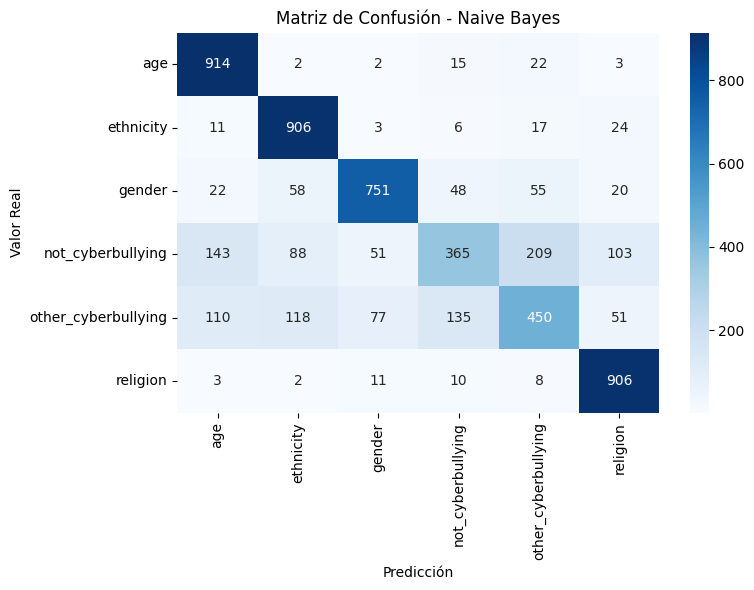

In [20]:
from sklearn.naive_bayes import MultinomialNB

# etiquetas
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_small['cyberbullying_type'])
X = df_small['clean_text']

X_train, X_test, y_train, y_test = train_test_split( X, y, stratify=y, test_size=0.2, random_state=42)

# pipeline
nb_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=3000, ngram_range=(1, 1))),
    ('nb', MultinomialNB())
])

param_dist = {
    'nb__alpha': [0.001, 0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 1.0, 1.5, 2.0, 5.0, 10.0]
}

grid_nb = GridSearchCV(
    nb_pipeline,
    param_grid=param_dist,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
)

grid_nb.fit(X_train, y_train)


# Resultados
print(f"\n Mejor alpha: {grid_nb.best_params_}")
print(f"\n Mejor accuracy validación cruzada: {grid_nb.best_score_:.2f}")

y_pred = grid_nb.predict(X_test)
y_pred_labels = label_encoder.inverse_transform(y_pred)
y_test_labels = label_encoder.inverse_transform(y_test)

print("\n Reporte de clasificación:\n")
print(classification_report(y_test_labels, y_pred_labels))

# Matriz de confusión
conf_mat = confusion_matrix(y_test_labels, y_pred_labels)
labels = label_encoder.classes_

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title("Matriz de Confusión - Naive Bayes")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.tight_layout()
plt.savefig("confusion_matrix_nb_grid.png", dpi=300)
plt.show()

## Redes Neuronales

Fitting 5 folds for each of 4 candidates, totalling 20 fits

Mejores parámetros: {'mlp__activation': 'relu', 'mlp__alpha': 0.001, 'mlp__hidden_layer_sizes': (64,), 'mlp__learning_rate_init': 0.001, 'mlp__solver': 'adam'}
Mejor accuracy validación cruzada: 0.78

Reporte de clasificación:

                     precision    recall  f1-score   support

                age       0.94      0.95      0.95       958
          ethnicity       0.98      0.97      0.97       967
             gender       0.83      0.80      0.82       954
  not_cyberbullying       0.47      0.44      0.46       959
other_cyberbullying       0.50      0.55      0.53       941
           religion       0.92      0.93      0.92       940

           accuracy                           0.77      5719
          macro avg       0.77      0.77      0.77      5719
       weighted avg       0.78      0.77      0.77      5719



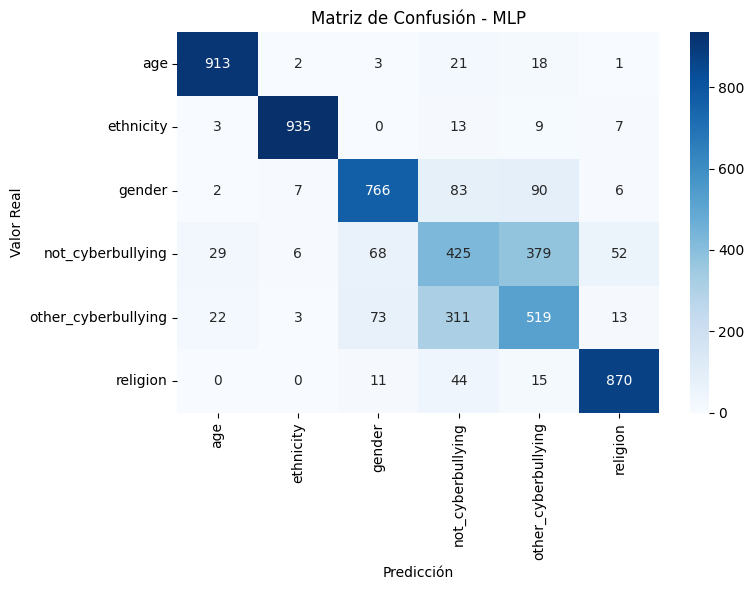

In [21]:
from sklearn.neural_network import MLPClassifier


# pipeline
mlp_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=1000, ngram_range=(1, 1))),
    ('mlp', MLPClassifier(max_iter=150, random_state=42))
])

# grid reducido
param_grid = {
    'mlp__hidden_layer_sizes': [(64,), (64, 32)],
    'mlp__activation': ['relu'],
    'mlp__alpha': [0.0001, 0.001],
    'mlp__learning_rate_init': [0.001],
    'mlp__solver': ['adam']
}
# 2 × 1 × 2 × 1 × 1 = 4 combinaciones, 20 modelos con CV=5

grid_mlp = GridSearchCV(
    mlp_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# entrenar
grid_mlp.fit(X_train, y_train)

# resultados
print(f"\nMejores parámetros: {grid_mlp.best_params_}")
print(f"Mejor accuracy validación cruzada: {grid_mlp.best_score_:.2f}")

# predicción
y_pred = grid_mlp.predict(X_test)
y_pred_labels = label_encoder.inverse_transform(y_pred)
y_test_labels = label_encoder.inverse_transform(y_test)

print("\nReporte de clasificación:\n")
print(classification_report(y_test_labels, y_pred_labels))

# matriz de confusión
conf_mat = confusion_matrix(y_test_labels, y_pred_labels)
labels = label_encoder.classes_

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title("Matriz de Confusión - MLP")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.tight_layout()
plt.savefig("confusion_matrix_mlp_grid.png", dpi=300)
plt.show()


# Implementación Algoritmos No Supervisados

## K-MEANS


In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# muestra del 60 %
df_small = df.sample(frac=0.6, random_state=42)

#  TF-IDF
vectorizer_kmeans = TfidfVectorizer(max_features=3000, ngram_range=(1, 1))
X_vectors = vectorizer_kmeans.fit_transform(df_small['clean_text'])

# Entrenar con 6 clusters
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
kmeans.fit(X_vectors)

cluster_labels = kmeans.labels_
silhouette = silhouette_score(X_vectors, cluster_labels)
print(f"Silhouette Score: {silhouette:.3f}")

# Reducir a 2D para visualización con PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_vectors.toarray())




Silhouette Score: 0.026


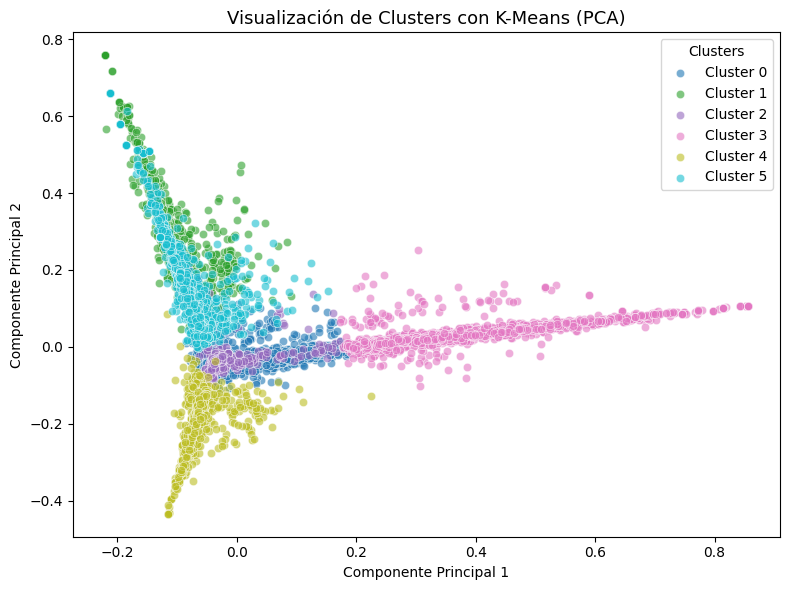

In [23]:
#visualización
plt.figure(figsize=(8, 6))
colors = plt.cm.tab10(np.linspace(0, 1, 6))

for i in range(6):
    plt.scatter(
        X_pca[cluster_labels == i, 0],
        X_pca[cluster_labels == i, 1],
        label=f"Cluster {i}",
        color=colors[i],
        alpha=0.6,
        edgecolors='w',
        linewidths=0.5
    )

plt.title("Visualización de Clusters con K-Means (PCA)", fontsize=13)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Clusters", loc="best", fontsize=10)
plt.tight_layout()
plt.savefig("kmeans_pca_clusters_con_leyenda.png", dpi=300)
plt.show()


In [24]:
print(f"Inercia total del modelo K-Means: {kmeans.inertia_:.2f}")


Inercia total del modelo K-Means: 26336.70


In [25]:
#nombres de caracterisitcas
feature_names = vectorizer_kmeans.get_feature_names_out()

df_tfidf = pd.DataFrame(X_vectors.toarray(), columns=feature_names)
df_tfidf['cluster'] = cluster_labels

top_terms_by_cluster = {}

for i in range(6):
    cluster_data = df_tfidf[df_tfidf['cluster'] == i].drop('cluster', axis=1)
    mean_tfidf = cluster_data.mean().sort_values(ascending=False)
    top_terms_by_cluster[i] = mean_tfidf.head(10).index.tolist()

for cluster, terms in top_terms_by_cluster.items():
    print(f"\nCluster {cluster}:")
    print(", ".join(terms))



Cluster 0:
muslim, idiot, woman, people, christian, know, right, black, bullying, call

Cluster 1:
girl, bullied, high, school, friend, year, middle, mean, people, getting

Cluster 2:
cant, lol, sexist, bully, call, woman, people, female, bitch, believe

Cluster 3:
fuck, dumb, nigger, as, obama, bitch, shit, fucking, mad, shut

Cluster 4:
joke, rape, gay, make, funny, people, making, prison, made, miley

Cluster 5:
bully, school, high, middle, kid, people, go, back, used, yard


In [26]:
df_small['cluster'] = cluster_labels
for i in range(kmeans.n_clusters):
    print(f"\nEjemplos del Cluster {i+1}:")
    ejemplos = df_small[df_small['cluster'] == i]['tweet_text'].head(3)
    for j, texto in enumerate(ejemplos, start=1):
        print(f"{j}. {texto}")



Ejemplos del Cluster 1:
1. Yup there still hot blondes #mkr
2. Ever get #bullied for being fat? Porky gets her revenge: http://t.co/dJTuOsX
3. @FarooqSumar @NafeezAhmed @MaxBlumenthal Wrong again. Islam = Nazism.  And Muslim murderers have exterminated Jews.

Ejemplos del Cluster 2:
1. That particular artist does very graphic doujins involving girls getting beat because she resents women for being bullied in high school. It's probably one of the more extreme examples but it's what I had on-hand.
2. Weak boys who got bullied in high school, who got massively rejected by girls and envied the jocks, become cops. When they do, it's a lifetime of payback for being overlooked.
3. Yes, he got bullied. Ya know, just like how you got bullied in high school for having a girls name.

Ejemplos del Cluster 3:
1. RT @wilw: Idiot in Chief can't even stay in script when he's talking about bombing a country he refused to accept refugees from.
2. mots7 was my first comeback and i loved it smmm, cant wa

In [27]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print("\nCantidad de tuits por clúster:")
for label, count in zip(unique, counts):
    print(f"  - Cluster {label}: {count} tuits")


Cantidad de tuits por clúster:
  - Cluster 0: 17591 tuits
  - Cluster 1: 2443 tuits
  - Cluster 2: 796 tuits
  - Cluster 3: 2867 tuits
  - Cluster 4: 2207 tuits
  - Cluster 5: 2690 tuits


## LDA

In [28]:
from sklearn.decomposition import LatentDirichletAllocation

df_small = df.sample(frac=0.6, random_state=42)

vectorizer = TfidfVectorizer(max_features=3000)
X_lda = vectorizer.fit_transform(df_small['clean_text'])


lda = LatentDirichletAllocation(
    n_components=6,
    random_state=42,
    learning_method='batch',
    max_iter=10
)
lda.fit(X_lda)

# palabras claves
terms = vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda.components_):
    print(f"Cluster {idx+1}:")
    print(", ".join([terms[i] for i in topic.argsort()[:-11:-1]]))


Cluster 1:
female, call, feminazi, kat, bitch, ur, first, sexist, andre, coon
Cluster 2:
joke, rape, gay, woman, people, make, white, funny, black, men
Cluster 3:
bully, school, high, girl, bullied, people, year, middle, know, time
Cluster 4:
fuck, dumb, nigger, as, obama, bitch, fucking, shit, nigga, mad
Cluster 5:
school, girl, bullied, high, bully, friend, people, kid, time, go
Cluster 6:
muslim, idiot, christian, islam, terrorist, islamic, bullying, terrorism, radical, support


In [29]:
topic_distributions = lda.transform(X_lda)
dominant_topics = topic_distributions.argmax(axis=1)
df_small['dominant_topic'] = dominant_topics

for topic in range(6):
    print(f"\nEjemplos del Cluster {topic+1}:")
    ejemplos = df_small[df_small['dominant_topic'] == topic]['tweet_text'].head(3)
    for i, texto in enumerate(ejemplos, 1):
        print(f"{i}. {texto}")



Ejemplos del Cluster 1:
1. Just chilling in #CrabFest15 VIP with the one and only Carol from houseruleson7. #Houserules #MKR https://t.co/q9pBziTZQU
2. Get a life idiot why call someone racist just be they won't go down on one knee for a thug I agree his death was horrible but would you ask all Muslims to get one one knee everytime they blow us up or run us down in lorries no you wouldn't because not all Muslims are killers
3. RT @Madasatrain69: #IslamExposed: An Unbelievable Degree of #PC Delusion on Display in #UK Press: http://t.co/ZwBZLD8T0f #Dhimmi kvetches a…

Ejemplos del Cluster 2:
1. RT @thetrudz: And, it is comical for Emma to mention "male gaze" re: Bey, when her speech CENTERED men and was not intersectional. https://…
2. bro... has he done anything recently? Like.. i know his past but I haven’t really seen him do anything racist in a long fucking time and he’s apologized so im confused.. but what I don’t like is white gay men fetishizing the mannerisms of black women.. bu

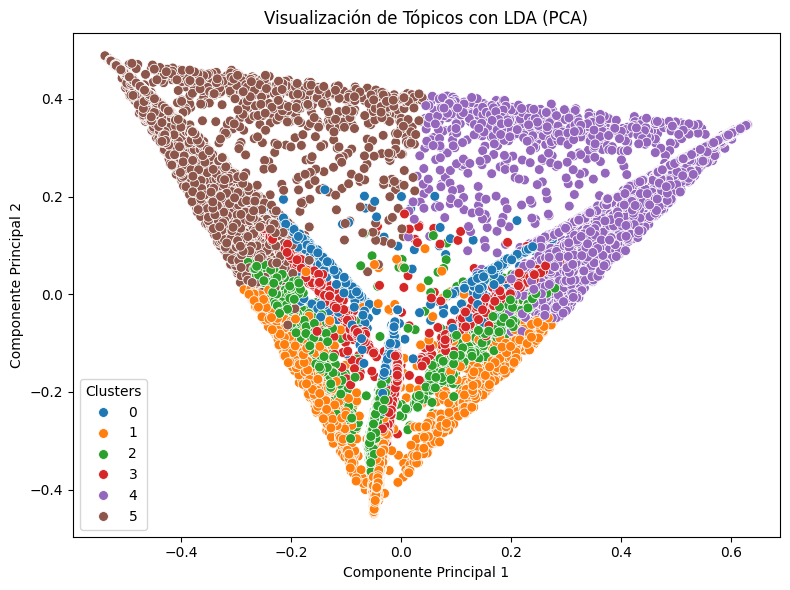

In [30]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(topic_distributions)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_small['dominant_topic'], palette='tab10', s=50)
plt.title("Visualización de Tópicos con LDA (PCA)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Clusters")
plt.tight_layout()
plt.savefig("lda_pca_topics.png", dpi=300)
plt.show()



## Agglometative Clustering


Cantidad de tuits por clúster:
  - Cluster 0: 10368 tuits
  - Cluster 1: 1499 tuits
  - Cluster 2: 680 tuits
  - Cluster 3: 315 tuits
  - Cluster 4: 110 tuits
  - Cluster 5: 1325 tuits

Ejemplos del Cluster 0:
  1. Yup there still hot blondes #mkr
  2. alissa violet rlly said "it's everyday bro w the same bully flow bully at school now your bullying your bro" and set the standard for the entire year of 2017
  3. Ever get #bullied for being fat? Porky gets her revenge: http://t.co/dJTuOsX

Ejemplos del Cluster 1:
  1. This SecState has become a joke. He speaks like a middle school yard bully.
  2. That particular artist does very graphic doujins involving girls getting beat because she resents women for being bullied in high school. It's probably one of the more extreme examples but it's what I had on-hand.
  3. Weak boys who got bullied in high school, who got massively rejected by girls and envied the jocks, become cops. When they do, it's a lifetime of payback for being overlooked.


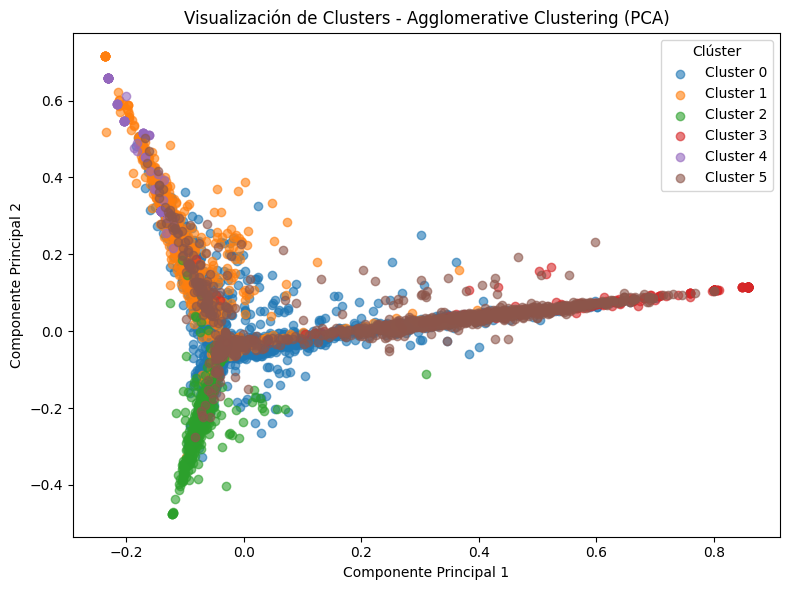

In [32]:
from sklearn.cluster import AgglomerativeClustering


df_small = df.sample(frac=0.3, random_state=42)

vectorizer = TfidfVectorizer(max_features=1500, ngram_range=(1, 1))
X_sparse = vectorizer.fit_transform(df_small['clean_text'])
X_dense = X_sparse.toarray()

agg_model = AgglomerativeClustering(n_clusters=6, linkage='ward')
agg_labels = agg_model.fit_predict(X_dense)
df_small['cluster'] = agg_labels  # asignar cluster al dataframe


unique, counts = np.unique(agg_labels, return_counts=True)
print("\nCantidad de tuits por clúster:")
for label, count in zip(unique, counts):
    print(f"  - Cluster {label}: {count} tuits")

for i in range(6):
    print(f"\nEjemplos del Cluster {i}:")
    ejemplos = df_small[df_small['cluster'] == i]['tweet_text'].head(3)
    for j, tweet in enumerate(ejemplos, 1):
        print(f"  {j}. {tweet}")

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_dense)

plt.figure(figsize=(8, 6))
for cluster_id in np.unique(agg_labels):
    idx = agg_labels == cluster_id
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], label=f"Cluster {cluster_id}", alpha=0.6)

plt.title("Visualización de Clusters - Agglomerative Clustering (PCA)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Clúster")
plt.tight_layout()
plt.savefig("agglomerative_clusters_pca.png", dpi=300)
plt.show()


## DBSCAN

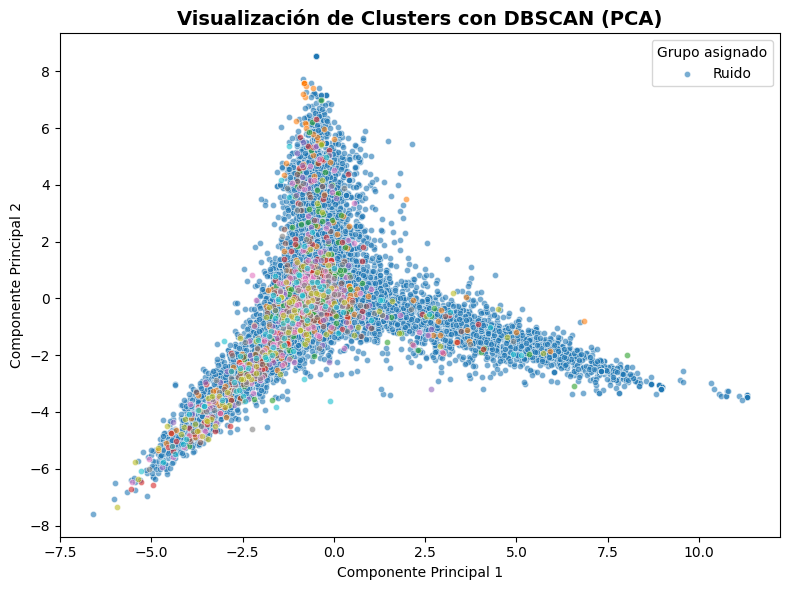

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN


df_small = df.sample(frac=0.30, random_state=42)

vectorizer = TfidfVectorizer(max_features=1500)
X_tfidf = vectorizer.fit_transform(df_small['clean_text'])

scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X_tfidf)

dbscan = DBSCAN(eps=0.5, min_samples=5, metric='cosine')
db_labels = dbscan.fit_predict(X_scaled)

X_dense = X_scaled.toarray()
X_pca = PCA(n_components=2, random_state=42).fit_transform(X_dense)

unique_labels = np.unique(db_labels)
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))


plt.figure(figsize=(8, 6))

for i, label in enumerate(unique_labels):
    idx = db_labels == label
    if np.sum(idx) == 0:
        continue

    # Mostrar en la leyenda solo el ruido
    label_text = "Ruido" if label == -1 else None

    plt.scatter(
        X_pca[idx, 0],
        X_pca[idx, 1],
        label=label_text,  # Solo el ruido tendrá texto
        color=colors[i],
        alpha=0.6,
        edgecolors='w',
        linewidths=0.5,
        s=20
    )

plt.title("Visualización de Clusters con DBSCAN (PCA)", fontsize=14, fontweight='bold')
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Grupo asignado", loc='best')
plt.tight_layout()
plt.savefig("dbscan_clusters_ruido_only_legend.png", dpi=300)
plt.show()


In [34]:
df_small['cluster'] = db_labels
for label in sorted(df_small['cluster'].unique()):
    print(f"\nEjemplos del cluster {label}:")
    ejemplos = df_small[df_small['cluster'] == label]['tweet_text'].head(3)
    for i, tweet in enumerate(ejemplos, 1):
        print(f"  {i}. {tweet}")



Ejemplos del cluster -1:
  1. #Hinduphobia_in_Arab Arab world : &gt;No Democracy. &gt;Religious sharia law. &gt;No religious freedom to non Muslims. &gt;Religious Umma. &gt;Muslim brotherhood. &gt;Never speak against genocide due to Islamic terrorism. Ur silence has caused “Islamophoba” not us. “Practice what u Preach”.
  2. Because they threaten to cut funding and resources if they come after them? You have to be a Grade A School Bully at the top of Politics. But don't hate the players, hate the game. Unless of course they turn into a Mussolini, Franco, De Gaulle, Corbyn, Sturgeon type dictator
  3. Just chilling in #CrabFest15 VIP with the one and only Carol from houseruleson7. #Houserules #MKR https://t.co/q9pBziTZQU

Ejemplos del cluster 0:
  1. Yup there still hot blondes #mkr
  2. alissa violet rlly said "it's everyday bro w the same bully flow bully at school now your bullying your bro" and set the standard for the entire year of 2017
  3. Ever get #bullied for being fat? Porky

In [35]:
from collections import Counter

for label in sorted(df_small['cluster'].unique()):
    print(f"\nPalabras clave del cluster {label}:")
    textos = df_small[df_small['cluster'] == label]['clean_text']
    palabras = ' '.join(textos).split()
    top_palabras = Counter(palabras).most_common(10)
    print([p[0] for p in top_palabras])



Palabras clave del cluster -1:
['school', 'muslim', 'people', 'girl', 'joke', 'idiot', 'high', 'bully', 'bullied', 'gay']

Palabras clave del cluster 0:
['school', 'fuck', 'nigger', 'dumb', 'bully', 'girl', 'joke', 'high', 'bullied', 'as']

Palabras clave del cluster 1:
['boy', 'masculinity', 'gay', 'rape', 'joke', 'think', 'girlfriend', 'give', 'cant', 'need']

Palabras clave del cluster 2:
['breaking', 'site', 'school', 'high', 'heart', 'bully', 'failed', 'people', 'dun', 'think']

Palabras clave del cluster 3:
['inside', 'wanting', 'violent', 'caught', 'school', 'religion', 'girl', 'gay', 'high', 'bullied']

Palabras clave del cluster 4:
['christ', 'jesus', 'fucking', 'milk', 'sick', 'word', 'bullied', 'high', 'school', 'people']

Palabras clave del cluster 5:
['fellow', 'muslim', 'said', 'idiot', 'say', 'woman', 'terrorist', 'fighting', 'thn', 'ive']

Palabras clave del cluster 6:
['co', 'called', 'call', 'female', 'bullied', 'doesnt', 'lol', 'first', 'ur', 'woman']

Palabras clav